In [1]:
# import libraries


import pandas as pd

nydf = pd.read_csv (r'C:\Users\giorg\OneDrive\Υπολογιστής\MSc_Data_Science_&_CI\Machine Learning\Coursework\Dataset\AB_NYC_2019.csv')


In [2]:
################
#Data exploring#
################

In [3]:
pd.options.display.max_columns=30

In [4]:
nydf.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0


In [5]:
nydf.shape

(48895, 16)

In [6]:
#we can get the missing values (if a column doesn't have 48895 entires means that has missing values)

nydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# any entry with 'True' is a missing value

nydf.isna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [8]:
nydf_missing = nydf.isna()

In [9]:
#Percentage of missing values in each column

nydf_missing.mean().round(4) * 100

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

In [10]:
####################
#some data cleaning#
####################

In [11]:
# according to the dataset the Rooms with 0 'number_of_reviews' had as null the columns 'last_review' & 'review_per_month'
# so I replaced them as also 0, because we might need them in our analysis

nydf['last_review']=nydf['last_review'].fillna(0)
nydf['reviews_per_month']=nydf['reviews_per_month'].fillna(0)


In [12]:
nydf_missing = nydf.isna()

In [13]:
# only a small percentage of null values exists in 'name' and in 'host_name'

nydf_missing.mean().round(4) * 100

id                                0.00
name                              0.03
host_id                           0.00
host_name                         0.04
neighbourhood_group               0.00
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                       0.00
reviews_per_month                 0.00
calculated_host_listings_count    0.00
availability_365                  0.00
dtype: float64

In [14]:
#replacing the 'name' column according to what actually is

nydf.rename(columns={'name': 'room info'}, inplace=True)

In [15]:
nydf.head(3)

,id,room info,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365


In [16]:
#I used Excell to filter the rows with the blanks names so as to check if we can find another another entry with the same 'host_id'
#so as to replace the blank names but it seems that there is no way we can replace the missing values in 'host_name'

nydf[nydf.host_id == 228750026]

,id,room info,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38992,30468335,LARGE Prospect Lefferts Gardens Bedroom,228750026,NaN,Brooklyn,Flatbush,40.65152,-73.95271,Private room,55,7,0,0,0.0,1,69


In [17]:
# No duplicates in our dataset

nydf.duplicated().sum()


0

In [18]:
#############################
#Encoding categorical values#
#############################

In [19]:
#in order to flag 'room type' and 'neighbourhood' into numbers to use for regression I had to change the type into category

cols = ['room_type', 'neighbourhood_group']
nydf[cols] = nydf[cols].astype('category')

In [20]:
# Entire home = 0, private room = 1, shared room = 2

nydf["room_type"] = nydf["room_type"].cat.codes
nydf.head(5)

,id,room info,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,1,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,0,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,1,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,0,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,0,80,10,9,19/11/2018,0.10,1,0


In [21]:
# Bronx = 0, Brooklyn = 1, Manhatan = 2, Queens = 3, Staten Island = 4

nydf["neighbourhood_group"] = nydf["neighbourhood_group"].cat.codes
nydf.head()

,id,room info,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,1,Kensington,40.64749,-73.97237,1,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,2,Midtown,40.75362,-73.98377,0,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2,Harlem,40.80902,-73.94190,1,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,Clinton Hill,40.68514,-73.95976,0,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,2,East Harlem,40.79851,-73.94399,0,80,10,9,19/11/2018,0.10,1,0


In [22]:
nydf.isnull().sum()

id                                 0
room info                         16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [23]:
nydf.shape

(48895, 16)

In [24]:
# I will just drop the null values

nydf = nydf.dropna()

In [25]:
nydf.isnull().sum()

id                                0
room info                         0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [26]:
#########################
#some data visualization#
#########################

Index(['id', 'room info', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

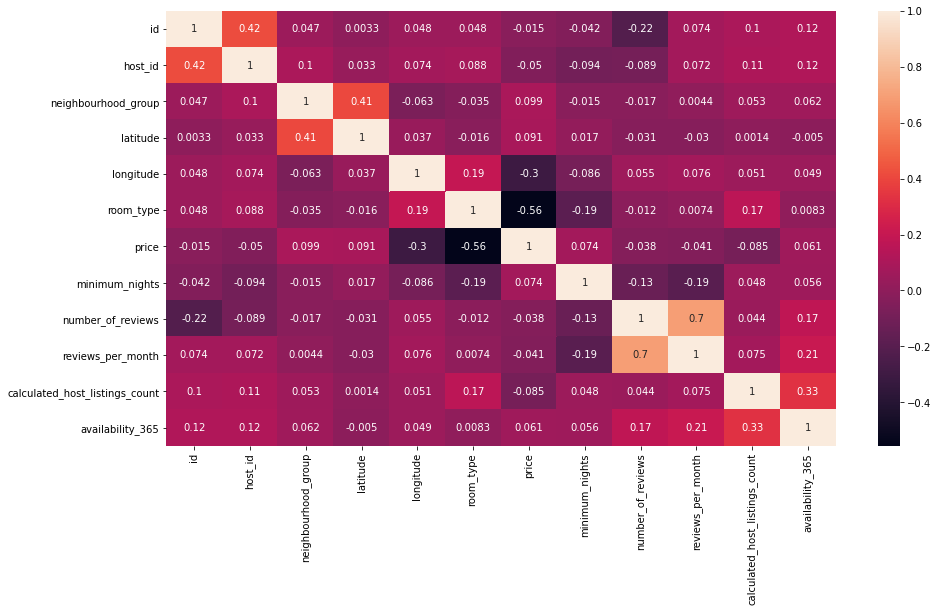

In [27]:
# correlation between variables

import matplotlib.pyplot as plt
import seaborn as sns

corr = nydf.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
nydf.columns

Text(0.5, 1.0, 'Room type')

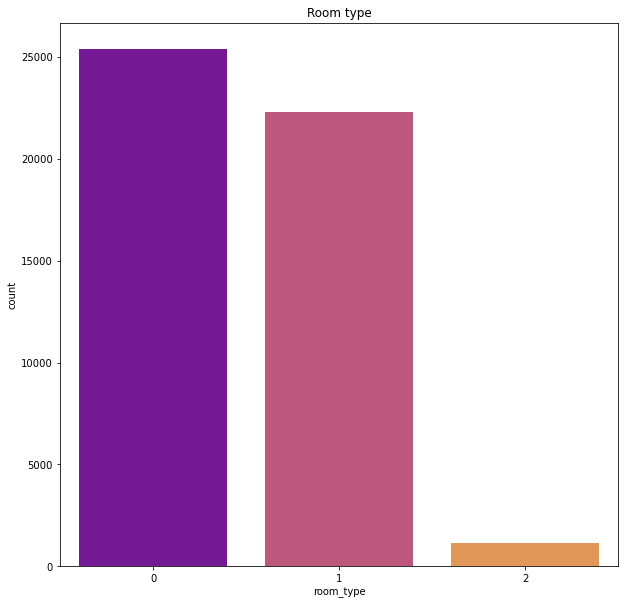

In [28]:
sns.countplot(nydf['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Room type')

Text(0.5, 1.0, 'Neighborhood group')

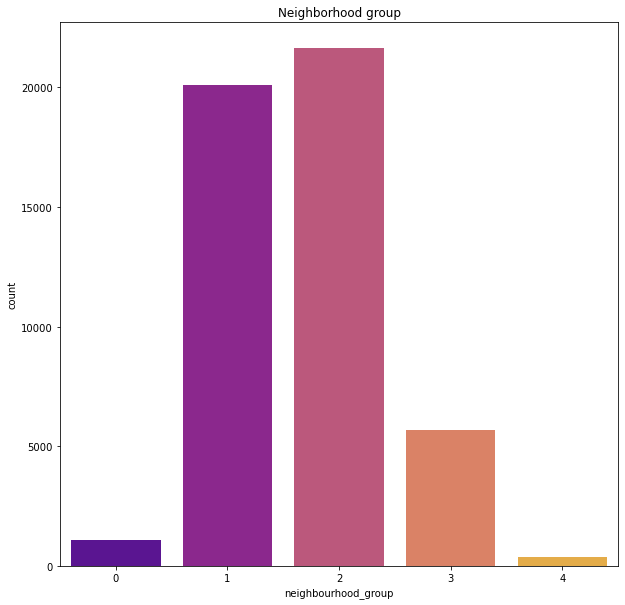

In [29]:
sns.countplot(nydf['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighborhood group')

In [30]:
###############################
#Clustering with 2 attributes#
##############################

In [131]:
import numpy as np
from sklearn.cluster import KMeans

X = np.array(nydf[['longitude', 'latitude', 'host_id',  
                 'neighbourhood_group', 'room_type', 'number_of_reviews', 'price',
                 'minimum_nights', 'calculated_host_listings_count', 'availability_365']])

k = 4
model = KMeans(n_clusters=k, random_state=17).fit(X)
class_predictions = model.predict(X)
nydf[f'Cluster_'] = class_predictions

In [132]:
nydf.head()

,id,room info,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Cluster_
0,2539,Clean & quiet apt home by the park,2787,John,1,Kensington,40.64749,-73.97237,1,149,1,9,19/10/2018,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,2,Midtown,40.75362,-73.98377,0,225,1,45,21/05/2019,0.38,2,355,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2,Harlem,40.80902,-73.94190,1,150,3,0,0,0.00,1,365,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,Clinton Hill,40.68514,-73.95976,0,89,1,270,05/07/2019,4.64,1,194,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,2,East Harlem,40.79851,-73.94399,0,80,10,9,19/11/2018,0.10,1,0,0


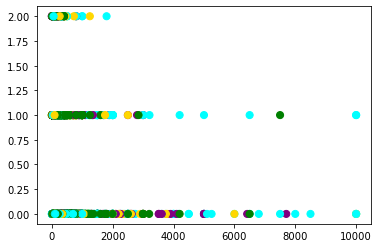

In [133]:
colormap = np.array(['aqua','purple','gold','green'])

plt.scatter(nydf['price'], nydf['room_type'], c=colormap[class_predictions], s=50, cmap='viridis')

centers = kmeans.cluster_centers_


In [134]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

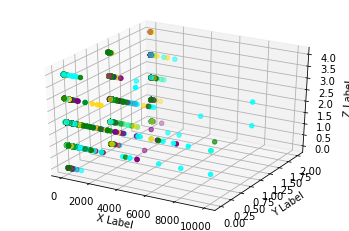

In [138]:
colormap = np.array(['aqua','purple','gold','green'])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = nydf['price']
ys = nydf['room_type']
zs = nydf['neighbourhood_group']



ax.scatter(xs,ys,zs, c=colormap[class_predictions], marker='o')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()